## **Israel Elections Data - Lab 3**
1. Idan Keipour 315355537
2. Menachem Sokolik 314696972
3. Maria Mordvova 345232821


In [ ]:
# Add a check if we run in google colab or locally in jupyter notebook
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')


Running on CoLab


In [ ]:
# Import modules 
import numpy as np  # a module for working with numerical array 
import pandas as pd  # a module for working with data-frames
import statsmodels.api as sm  # a module for statistical modelling (e.g. regression analysis)
from matplotlib import pyplot as plt # a module for working with plots
import random
import io

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading elections 2021 elections data:
if run_in_colab:
    from google.colab import files
    uploaded = files.upload()

Saving votes per ballot 2021.csv to votes per ballot 2021.csv
Saving votes per city 2021.csv to votes per city 2021.csv


In [ ]:
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per city 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally


if   run_in_colab:
    df_2021_ballots_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:
  df_2021_ballots_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')  # need to read locally

df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2021
df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns


*Create* a dictionary mapping parties names to voting letters

In [ ]:
parties_dict_2021 ={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"}


In [ ]:
# Compute votes share only for parties above a certain threshold 
def parties_votes_percents(df, thresh):
    par = df.sum().div(df.sum().sum()).sort_values(ascending=False)
    return par[par > thresh]

# dataframe of parties that pass the votes rate
df_2021_parties_votes_pass = parties_votes_percents(df_2021,0.0325)
names = df_2021_parties_votes_pass.keys() 


In [ ]:
clean_data = df_2021_ballots_raw[np.intersect1d(df_2021_ballots_raw.columns, names)] #Keeps only past parties
clean_data = clean_data.drop('מעטפות חיצוניות') #removes "מעטפות חיצוניות"

Question 1:

הפונקציה מקבלת שני מסדי נתונים באותו הגודל. הראשון מייצג את מספר המצביעים הפוטנציאלים (לכל מלגה וקלפי) והשני מייצג את ההסתברות שתומך פוטנציאלי אכן יילך להצביע.
הפונקציה מחזירה את מספר המצביעים בפועל המתפלג בינומית עם הערכים שמתקבלים במסדי הנתונים כקלט

In [ ]:
def calc_bin(nij,vij):
  prob = pd.DataFrame(np.random.binomial(nij,vij), index = nij.index, columns= nij.columns)
  return prob


Question 2:

  :n_ij ראשית נבנה את הטבלה שתשמש אותנו לסימולציות בתור

In [ ]:
total_bzb = df_2021_ballots_raw['בזב'].sum()
total_kosher = df_2021_ballots_raw['כשרים'].sum()
adj_data = round(clean_data * (total_bzb / total_kosher)) #This is the build of nij
adj_data.head()

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,70.0,0.0,0.0,4.0,3.0,24.0,3.0,7.0,46.0,0.0,40.0,1.0,12.0
אדירים,1.0,10.0,6.0,0.0,13.0,4.0,0.0,125.0,0.0,0.0,3.0,91.0,9.0
אושה,107.0,10.0,0.0,4.0,0.0,55.0,12.0,36.0,30.0,0.0,128.0,0.0,22.0
אחווה,21.0,6.0,0.0,0.0,6.0,54.0,4.0,40.0,15.0,0.0,55.0,3.0,12.0
איבים,0.0,6.0,0.0,0.0,15.0,7.0,0.0,25.0,0.0,0.0,0.0,1.0,0.0


כעת נחשב את מטריצת ההסתברויות עבור ההנחה הראשונה:

In [ ]:
vij_1 = df_2021_ballots_raw.drop('מעטפות חיצוניות').copy()
for i in list(vij_1.index):
  prop = vij_1.at[i,"כשרים"] / vij_1.at[i,"בזב"]
  for j in list(names):
    vij_1.loc[i,j] = prop

#vij_1 is the df of vij for the first assumption

In [ ]:
vij_1 = vij_1[np.intersect1d(vij_1.columns, names)] #Keeps only past parties
vij_1.head()

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733,0.678733
אדירים,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231,0.769231
אושה,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513,0.722513
אחווה,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350,0.792350
איבים,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855,0.289855


 vij=Bj כעת נבנה את המטריצה עבור:
 
הצבנו את הערכים בסדר עולה ולפי סדר ההצגה של המפלגות במסד הנתונים

In [ ]:
vij_2 = clean_data.copy()
val = list([0.2,	0.25,	0.3,	0.35,	0.4,	0.45,	0.5,	0.55,	0.6,	0.65,	0.7,	0.75,	0.8])
for i in list(vij_2.index):
  vij_2.loc[i] = vij_2.loc[i]*0 + val
vij_2.head()

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8
אדירים,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8
אושה,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8
אחווה,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8
איבים,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8


מוגרל אקראית לכל יישוב Bj כעת נבנה את המטריצה כאשר

In [ ]:
vij_3 = clean_data.copy()
val = list([0.2,	0.25,	0.3,	0.35,	0.4,	0.45,	0.5,	0.55,	0.6,	0.65,	0.7,	0.75,	0.8])
for i in list(vij_3.index):
  vij_3.loc[i] = vij_3.loc[i]*0 + np.random.choice(val, size=13 , replace=False)
vij_3.head()

,אמת,ב,ג,ודעם,ט,כן,ל,מחל,מרצ,עם,פה,שס,ת
שם ישוב,,,,,,,,,,,,,
אבירים,0.40,0.70,0.45,0.35,0.50,0.30,0.65,0.80,0.75,0.55,0.25,0.60,0.20
אדירים,0.45,0.75,0.30,0.25,0.60,0.70,0.65,0.40,0.80,0.35,0.20,0.50,0.55
אושה,0.65,0.45,0.50,0.40,0.75,0.60,0.25,0.55,0.30,0.80,0.70,0.20,0.35
אחווה,0.25,0.70,0.45,0.40,0.80,0.55,0.30,0.60,0.75,0.20,0.50,0.35,0.65
איבים,0.70,0.20,0.65,0.60,0.30,0.80,0.75,0.25,0.45,0.50,0.35,0.55,0.40


לפי תוצאות האמת q בשלב זה נמצא את האומד ל

In [ ]:
corection = df_2021_ballots_raw.drop('מעטפות חיצוניות')
corection = corection['בזב']/corection['כשרים']

real_q = clean_data.mul(corection, axis = "rows")
real_q = parties_votes_percents(real_q, 0) #The blocking percentage is 0 because we have already deleted the parties that did not pass the blocking percentage

נבנה פונקציה המקבלת שני מסדי נתונים ומבצעת 50 סימולציות באמצעות הפונקציה שבנינו בשאלה הקודמת.

-הפונקציה מחשבת עבור כל סימולציה מהם האומדים ל

q ו p

הפונקציה מחזירה שתי מטריצות כאשר כל אחת מהן מכילה את האומדים שיצאו בסימולציות

In [ ]:
def simul(df_n, df_v):
  df_of_p = pd.DataFrame(pd.np.empty([0, 0])) #In this df we insert the value of "p" for every simulation
  df_of_q = pd.DataFrame(pd.np.empty([0, 0])) #In this df we insert the value of "q" for every simulation
  for i in range(50):
    sim = calc_bin(df_n, df_v)
    p = parties_votes_percents(sim, 0) 
    adjasted = sim.mul(corection, axis = "rows")
    q = parties_votes_percents(adjasted, 0)
    df_of_p = df_of_p.append(p, ignore_index = True)
    df_of_q = df_of_p.append(q, ignore_index = True)
  
  return df_of_p, df_of_q

כעת נחשב את האומדים עצמם לכל אחת מההנחות באמצעות הפונקציה שבנינו בסעיף הקודם

In [ ]:
first_p , first_q = simul(adj_data,vij_1)
first_q_mean = first_q.mean(axis = 0).to_frame().T
first_q_bias = first_q_mean - real_q
first_q_var = first_q.var(axis = 0).to_frame().T
first_q_mse = (first_q_var + (first_q_bias**2))
first_p_mean = first_p.mean(axis = 0).to_frame().T
first_p_sd = first_p.std(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
second_p , second_q = simul(adj_data,vij_2)
second_q_mean = second_q.mean(axis = 0).to_frame().T
second_q_bias = second_q_mean - real_q
second_q_var = second_q.var(axis = 0).to_frame().T
second_q_mse = second_q_var + (second_q_bias**2)
second_p_mean = second_p.mean(axis = 0).to_frame().T
second_p_sd = second_p.std(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
third_p , third_q = simul(adj_data,vij_3)
third_q_mean = third_q.mean(axis = 0).to_frame().T
third_q_bias = third_q_mean - real_q
third_q_var = third_q.var(axis = 0).to_frame().T
third_q_mse = third_q_var + (third_q_bias**2)
third_p_mean = third_p.mean(axis = 0).to_frame().T
third_p_sd = third_p.std(axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  This is separate from the ipykernel package so we can avoid doing imports until



לפי כל אחת מההנחות q כעת נציג את הטבלה שמראה את ערכי האומד של

In [ ]:
frames = [first_q_mean, second_q_mean, third_q_mean]
df_mean = pd.concat(frames)
df_mean.index = ["First assumption", "Second assumption", "Third assumption"]
df_mean = df_mean.rename(columns = parties_dict_2021)
df_mean

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
First assumption,0.062234,0.063007,0.065635,0.038069,0.053700,0.071166,0.051840,0.243491,0.047015,0.030744,0.148195,0.076289,0.048617
Second assumption,0.022729,0.028385,0.034067,0.034456,0.038420,0.057997,0.053720,0.258156,0.052810,0.051087,0.189288,0.106323,0.072561
Third assumption,0.060860,0.060579,0.068775,0.051604,0.051422,0.058320,0.051262,0.243029,0.041941,0.035088,0.150538,0.077979,0.048602


לפי כל אחת מההנחות bias כעת נציג את הטבלה שמראה את ערכי האומד של

In [ ]:
frames = [first_q_bias, second_q_bias, third_q_bias]
df_bias = pd.concat(frames)
df_bias.index = ["First assumption", "Second assumption", "Third assumption"]
df_bias = df_bias.rename(columns = parties_dict_2021)
df_bias

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
First assumption,0.006219,0.007989,0.012052,-0.032772,0.007201,0.008422,-0.008670,-0.000653,0.001967,-0.025250,0.015582,0.005007,0.002905
Second assumption,-0.033285,-0.026634,-0.019516,-0.036385,-0.008079,-0.004746,-0.006790,0.014012,0.007762,-0.004906,0.056675,0.035042,0.026850
Third assumption,0.004845,0.005561,0.015192,-0.019237,0.004923,-0.004424,-0.009248,-0.001114,-0.003107,-0.020905,0.017926,0.006697,0.002890


 כעת נציג את הטבלה שמראה את ערכי האומד של השונות לפי כל אחת מההנחות

In [ ]:
frames = [first_q_var, second_q_var, third_q_var]
df_var = pd.concat(frames)
df_var.index = ["First assumption", "Second assumption", "Third assumption"]
df_var = df_var.rename(columns = parties_dict_2021)
df_var

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
First assumption,1.486969e-07,2.399681e-07,7.824036e-07,0.000004,2.246439e-07,2.752677e-07,3.836157e-07,1.064631e-07,2.051470e-08,0.000002,8.226436e-07,1.045271e-07,2.246845e-08
Second assumption,5.244159e-08,1.014647e-07,2.454178e-07,0.000003,1.833355e-07,3.673837e-07,3.586970e-07,6.124201e-08,4.198998e-08,0.000007,2.747823e-06,3.771038e-07,1.621327e-07
Third assumption,2.633910e-07,3.266100e-07,8.611276e-07,0.000008,2.791385e-07,3.325298e-07,3.192790e-07,6.131054e-08,1.984397e-08,0.000004,1.345040e-06,1.935752e-07,8.455007e-08


 כעת נציג את הטבלה שמראה את ערכי האומד של השגיאה הריבועית לפי כל אחת מההנחות

In [ ]:
frames = [first_q_mse, second_q_mse, third_q_mse]
df_mse = pd.concat(frames)
df_mse.index = ["First assumption", "Second assumption", "Third assumption"]
df_mse = df_mse.rename(columns = parties_dict_2021)
df_mse

,עבודה,ימינה,יהדות התורה,הרשימה המשותפת,הציונות הדתית,כחול לבן,ישראל ביתנו,הליכוד,מרצ,רעם,יש עתיד,שס,תקוה חדשה
First assumption,0.000039,0.000064,0.000146,0.001078,0.000052,0.000071,0.000076,5.329112e-07,0.000004,0.000640,0.000244,0.000025,0.000008
Second assumption,0.001108,0.000709,0.000381,0.001327,0.000065,0.000023,0.000046,1.963983e-04,0.000060,0.000031,0.003215,0.001228,0.000721
Third assumption,0.000024,0.000031,0.000232,0.000378,0.000025,0.000020,0.000086,1.302646e-06,0.000010,0.000441,0.000323,0.000045,0.000008


ניתן לראות שכאשר אנו מבצעים את החישוב לפי ההנחה השניה ישנן מפלגות רבות שנפגעו כתוצאה מהחישוב  ולעומת זאת ישנם מפלגות שהרוויחו.
תוצאה זו היא צפויה מכיוון שהנחנו באופן שרירותי שעבור מפלגות מסויימות יש סיכוי פחות גבוה שהתומכים יגיעו להצביע ולכן ממילא אנו צופים שיש להם פחות אחוזי תמיכה.  כך למשל ניתן לראות שמפלגות העבודה וימינה קיבלו משמעותית פחות אחוזי תמיכה בסימולציה של ההנחה השניה לעומת הסימולציות האחרות.

בנוסף ניתן להבחין כי התוצאות של הסימולציה לפי ההנחה הראשונה והתוצאות לפי ההנחה השלישית הן דומות. דבר זה נובע מכך שההנחה השלישית מגרילה בצורה אקראית ואחידה את ההסתברויות בין כל המפלגות אך באופן שונה בין כל עיר.
לכן אנו נצפה שבממוצע כל אחת מהמפלגות תיפגע באופן דומה למפלגות האחרות ולא תהיה מפלגה שתקבל הסתברויות המפלות לראה בצורה קיצונית לעומת האחרות. לפיכך התוצאות שאנו רואים לפי הנחה זו דומות לתוצאות שבהנחה הראשונה שמדמות בצורה הטובה ביותר מבין שלושת ההנחות את תוצאות האמת.

In [ ]:
def party_bar_fix(real_q, q, p, q_sd, p_sd):
    width = 0.25
    votes = df_2021_parties_votes_pass  # total votes for each party
    n = len(votes)  # number of parties
    names = votes.keys()
    rev_names = [parties_dict_2021[name][::-1] for name in list(names)]
    fig, ax = plt.subplots()

    realq_bar = ax.bar(np.arange(n), list(real_q), width, color='g')
    adjq_bar = ax.bar(np.arange(n)+ width, list(q.loc[0,names]),yerr= p_sd , align='center', alpha=0.5, ecolor='black', capsize=5, width=0.25, color='r')
    adj2q_bar = ax.bar(np.arange(n)+ 2*width, list(p.loc[0,names]), yerr= q_sd , align='center', alpha=0.5, ecolor='black', capsize=5, width=0.25, color='b')

    ax.set_ylabel('% of votes')
    ax.set_xlabel('Parties Names')
    ax.set_title('% of votes per party (simulation)')
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names, rotation=-90)
    ax.legend((realq_bar, adjq_bar, adj2q_bar), ('real q', 'hat q', 'p'))

    plt.show()

    return fig, ax,


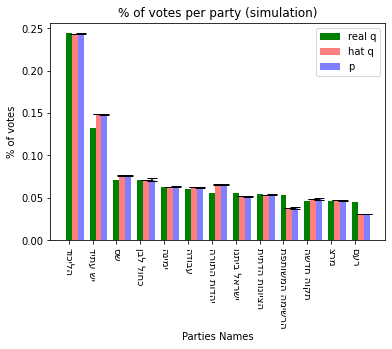

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f782c3b90>)

In [ ]:
first_q_sd = np.sqrt(df_var.iloc[0,:])
party_bar_fix(real_q, first_q_mean, first_p_mean, first_q_sd, first_p_sd)

BAR 1: When we take the original data and based on it we build the ratio to each indicator and each party then we can observe that the distribution is almost identical to all three values.

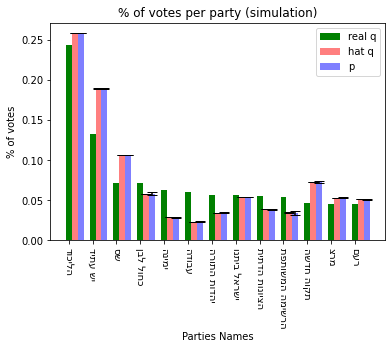

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f781c6c50>)

In [ ]:
second_q_sd = np.sqrt(df_var.iloc[1,:])
party_bar_fix(real_q, second_q_mean, second_p_mean, second_q_sd, second_p_sd)

BAR 2: In the second case, we defined the turnout result for every party as we wished,  we can see that the P and Q-Hat values are higher than the original Q for the parties that received a relatively high turnout.
This does make sense because in advance these parties lean upward in the voting frequency in accordance with how we determined the ratio in the second method, compared to other parties.

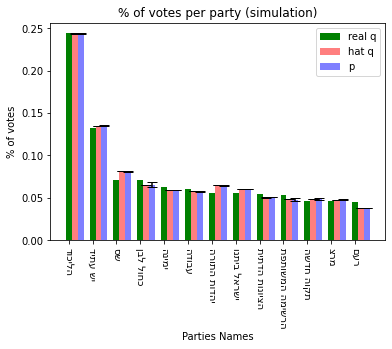

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f780a13d0>)

In [ ]:
third_q_sd = np.sqrt(df_var.iloc[2,:])
party_bar_fix(real_q, third_q_mean, third_p_mean, third_q_sd, third_p_sd)

BAR 3: According to the third method it can be seen that the results of Pi and Q-hat are really close to reality, since according to this method the ratio is divided randomly among parties and thus, each party is less deprived than in the second method, where we got a specific prevalence for each party.





Comparison of methods: We can see that on all three graphs we got relatively low variations, because we made 50 random simulation from the same distribution in each of the simulations.

In our opinion, the best simulation method (which is the closest to reality) is the first method by which we relied on the ratio from the real choices. Regarding second method, we noticed that the results of it are far away from the reality since in this method we divided the ratio as we wished and therefore each party received a specific ratio, which lead to deprived/prejudiced results. The third method is closer to reality because according to this method the ratio that each party received was randomly divided so that each locality receives the same values ​​for each party, and therefore in overall view there is equality between the parties and no party was discriminated as a result of the dispute.

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Lab3.ipynb

[NbConvertApp] Converting notebook ///content/Lab3.ipynb to html
[NbConvertApp] Writing 406401 bytes to ///content/Lab3.html
